### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as matp

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
#Creando la funcion para preparar los datos de las tiendas
def prep_tienda(df, nombre_tienda):
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')
  df['Año'] = df['Fecha de Compra'].dt.year
  df['Facturacion'] = df ['Precio']
  df['Tienda'] = nombre_tienda
  return df[['Año', 'Facturacion', 'Tienda']]

In [3]:
#Aplicando la Funcion prep_tienda
t1 = prep_tienda(tienda, 'Tienda 1')
t2 = prep_tienda(tienda2, 'Tienda 2')
t3 = prep_tienda(tienda3, 'Tienda 3')
t4 = prep_tienda(tienda4, 'Tienda 4')

#Unimos los datos de las tiendas
datos_unidos = pd.concat([t1, t2, t3, t4])

/tmp/ipython-input-3912777997.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')
/tmp/ipython-input-3912777997.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')


In [4]:
#Analizaremos por año y tienda
facturacion_ano_tienda = datos_unidos.groupby(['Año', 'Tienda'])['Facturacion'].sum().reset_index()

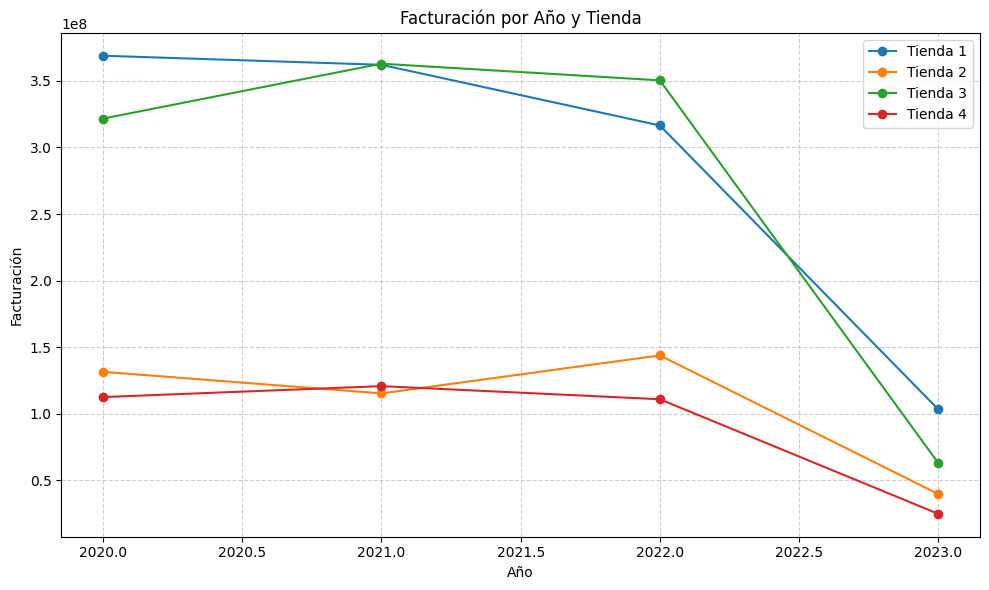

In [5]:
matp.figure(figsize=(10,6))

for tienda in facturacion_ano_tienda['Tienda'].unique():
  tienda_data = facturacion_ano_tienda[facturacion_ano_tienda['Tienda'] == tienda]
  matp.plot(tienda_data['Año'], tienda_data['Facturacion'], marker='o', label=tienda)

matp.xlabel('Año')
matp.ylabel('Facturación')
matp.title('Facturación por Año y Tienda')
matp.legend()
matp.grid(True, linestyle='--', alpha=0.6)
matp.tight_layout()
matp.show()

Segun el analisis por facturacion, podemos ver que la tienda 4 es la que menos ha facturado, a excepcion del año 2021, pero esto solo resulto en un caso en particular a lo largo de los 3 años en referencia.

# 2. Ventas por categoría

In [6]:
import pandas as pd
import matplotlib.pyplot as matp

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [7]:
#Creando la funcion para preparar los datos de las tiendas por categorias
def prep_tienda_categoria(df, nombre_tienda):
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')
  df['Año'] = df['Fecha de Compra'].dt.year
  df['Facturacion'] = df['Precio']
  df['Tienda'] = nombre_tienda
  df['Categoria'] = df['Categoría del Producto']
  return df[['Año', 'Categoria', 'Facturacion', 'Tienda']]

In [8]:
#Aplicamos la funcion prep_tienda_categoria
t1_cat = prep_tienda_categoria(tienda, 'Tienda 1')
t2_cat = prep_tienda_categoria(tienda2, 'Tienda 2')
t3_cat = prep_tienda_categoria(tienda3, 'Tienda 3')
t4_cat = prep_tienda_categoria(tienda4, 'Tienda 4')

#Unimos los datos de las tiendas
datos_unidos_cat = pd.concat([t1_cat, t2_cat, t3_cat, t4_cat])

/tmp/ipython-input-2551627068.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')
/tmp/ipython-input-2551627068.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')


In [9]:
#Agrupamos los datos
df_agrupado = datos_unidos_cat.groupby(['Tienda', 'Categoria'])['Facturacion'].sum().reset_index()

#Obtenemos una lista de tiendas únicas
tiendas = df_agrupado['Tienda'].unique()

In [10]:
#Hacemos Pivot para tener tiendas como filas y categorías como columnas
df_pivot = df_agrupado.pivot(index='Tienda', columns='Categoria', values='Facturacion').fillna(0)

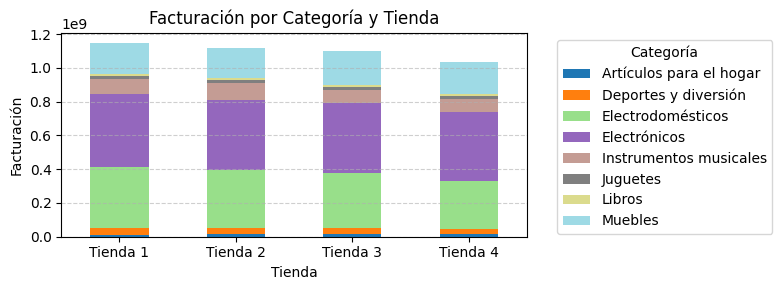

In [11]:
#Grafica de barras apiladas
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(8, 3), colormap='tab20')

matp.xlabel('Tienda')
matp.ylabel('Facturación')
matp.title('Facturación por Categoría y Tienda')
matp.xticks(rotation=0)
matp.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
matp.grid(axis='y', linestyle='--', alpha=0.6)
matp.tight_layout()
matp.show()


En el grafico podemos observar que las 4 tiendas tienen una venta similar en cuanto a categorias. Las 4 tiendas tienen una venta igualada en las categorias de Articulos para el hogar, deportes y diversión, juguetes y Libros. La Tienda 2 es la mayor en venta de Instrumentos musicales. La tienda 3 es la mayor en venta de Muebles. La Tienda 1 es la mayor en electrodomesticos y electronicos. Cabe resaltar que, si bien la tienda 4 no excede a alguna tienda en cualquier categoria, es la 2da con mayor venta en electronicos.

# 3. Calificación promedio de la tienda


In [12]:
import pandas as pd
import matplotlib.pyplot as matp

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [13]:
#Creando la funcion para preparar los datos de las tiendas por calificación
def prep_tienda_calif(df, nombre_tienda):
  df['Calificacion'] = df ['Calificación']
  df['Tienda'] = nombre_tienda
  return df[['Tienda', 'Calificacion']]

In [14]:
#Aplicamos la funcion prep_tienda_calif
t1_calif = prep_tienda_calif(tienda, 'Tienda 1')
t2_calif = prep_tienda_calif(tienda2, 'Tienda 2')
t3_calif = prep_tienda_calif(tienda3, 'Tienda 3')
t4_calif = prep_tienda_calif(tienda4, 'Tienda 4')

#Unimos los datos de las tiendas
datos_unidos_calif = pd.concat([t1_calif, t2_calif, t3_calif, t4_calif])

In [15]:
#Agrupamos por tienda y calculamos promedio
calif_promedio = datos_unidos_calif.groupby(['Tienda'])['Calificacion'].mean().reset_index()
calif_promedio['Calificacion'] = calif_promedio['Calificacion'].round(2)

/tmp/ipython-input-4037958055.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Tienda', y='Calificacion', data=calif_promedio, palette='viridis')


([0, 1, 2, 3],
 [Text(0, 0, 'Tienda 1'),
  Text(1, 0, 'Tienda 2'),
  Text(2, 0, 'Tienda 3'),
  Text(3, 0, 'Tienda 4')])

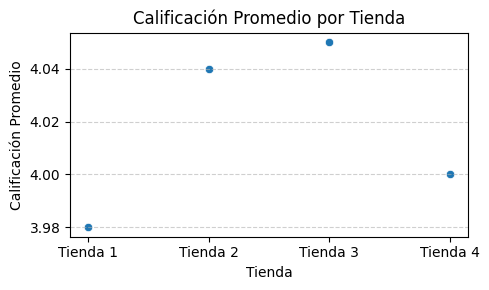

In [16]:
#Graficamos

import seaborn as sns

matp.figure(figsize=(5, 3))
sns.scatterplot(x='Tienda', y='Calificacion', data=calif_promedio, palette='viridis')
matp.xlabel('Tienda')
matp.ylabel('Calificación Promedio')
matp.title('Calificación Promedio por Tienda')
matp.grid(axis='y', linestyle='--', alpha=0.6)
matp.tight_layout()
matp.xticks(rotation=0)


Podemos observar que en promedio las Tiendas 2 y 3 son la que tiene una mayor calificación. La Tienda con menor calificación es la Tienda 1

# 4. Productos más y menos vendidos

In [17]:
import pandas as pd
import matplotlib.pyplot as matp

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [18]:
#Creando la funcion para preparar los datos de las tiendas por Producto
def prep_tienda_contar(df, nombre_tienda):
  df['Producto'] = df['Producto']
  df['Cantidad'] = int(1)
  df['Tienda'] = nombre_tienda
  return df[['Tienda', 'Producto', 'Cantidad']]

In [19]:
#Aplicamos la funcion prep_tienda_contar
t1_contar = prep_tienda_contar(tienda, 'Tienda 1')
t2_contar = prep_tienda_contar(tienda2, 'Tienda 2')
t3_contar = prep_tienda_contar(tienda3, 'Tienda 3')
t4_contar = prep_tienda_contar(tienda4, 'Tienda 4')

#Unimos los datos de las tiendas
datos_unidos_contar = pd.concat([t1_contar, t2_contar, t3_contar, t4_contar])

In [20]:
#Conteo por Tienda y productos
conteo_productos = datos_unidos_contar.groupby(['Tienda', 'Producto'])['Cantidad'].sum().reset_index()

#Calcular los productos mas y menos vendidos por tienda
productos_mas_vendidos = conteo_productos.loc[conteo_productos.groupby('Tienda')['Cantidad'].idxmax()]
productos_menos_vendidos = conteo_productos.loc[conteo_productos.groupby('Tienda')['Cantidad'].idxmin()]

#Total de ventas por tienda
total_ventas = conteo_productos.groupby('Tienda')['Cantidad'].sum().reset_index()
total_ventas['Producto'] = 'Total'
total_ventas = total_ventas[['Tienda', 'Producto', 'Cantidad']]
conteo_productos = pd.concat([total_ventas, productos_mas_vendidos, productos_menos_vendidos])

([0, 1, 2, 3],
 [Text(0, 0, 'Tienda 1'),
  Text(1, 0, 'Tienda 2'),
  Text(2, 0, 'Tienda 3'),
  Text(3, 0, 'Tienda 4')])

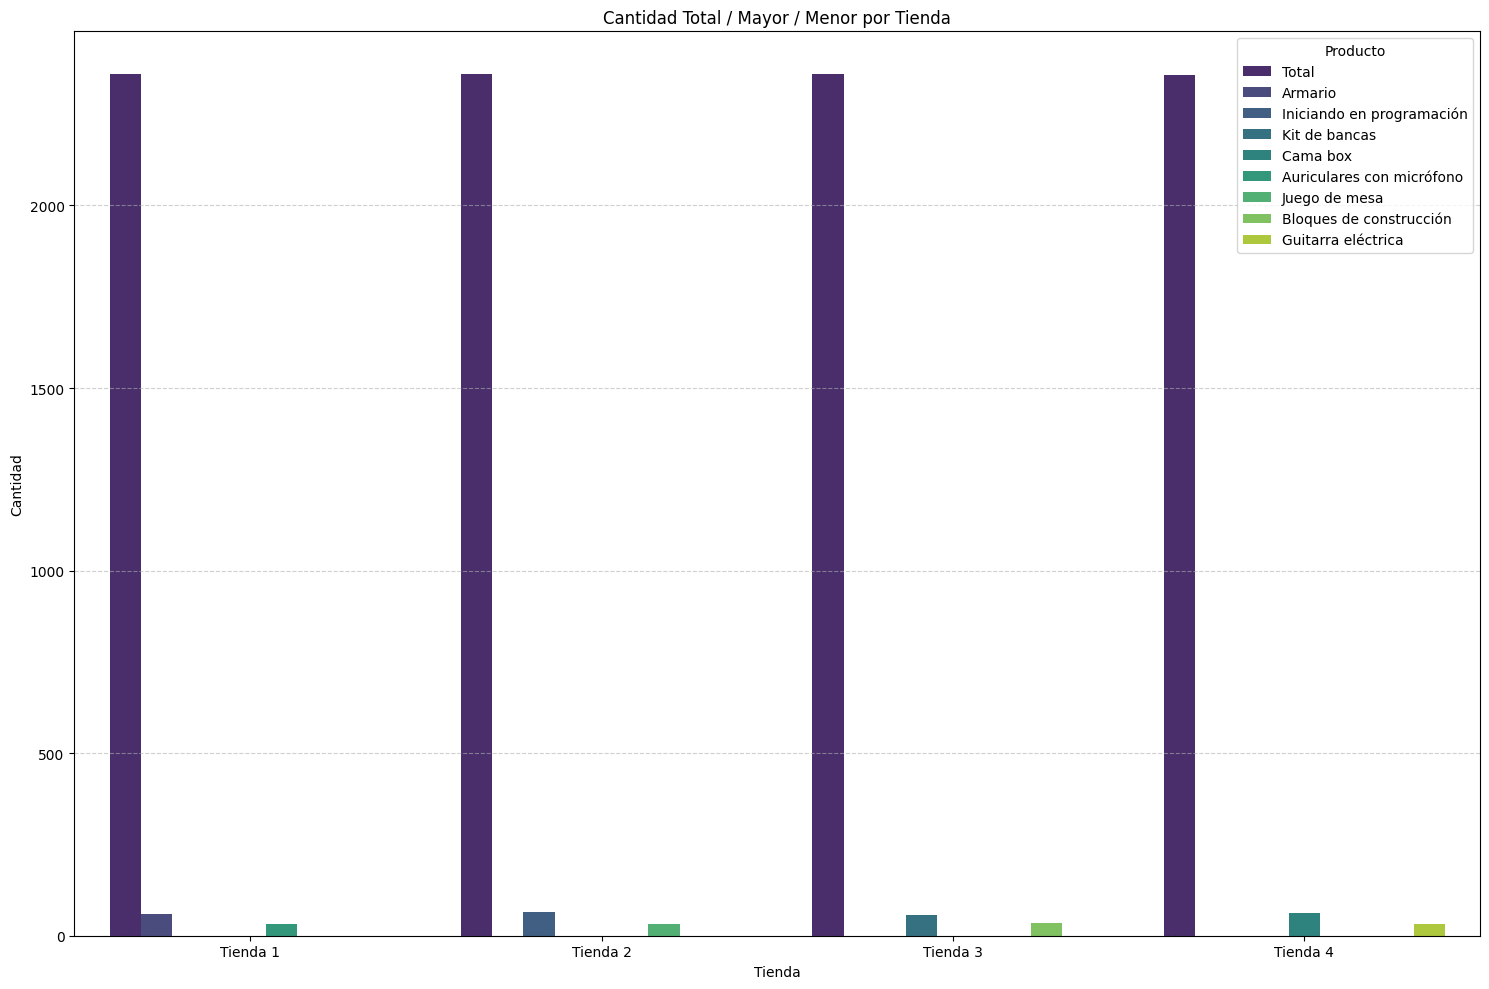

In [21]:
import seaborn as sns

matp.figure(figsize=(15, 10))
sns.barplot(x='Tienda', y='Cantidad',hue='Producto' , data=conteo_productos, palette='viridis')
matp.xlabel('Tienda')
matp.ylabel('Cantidad')
matp.title('Cantidad Total / Mayor / Menor por Tienda')
matp.grid(axis='y', linestyle='--', alpha=0.6)
matp.tight_layout()
matp.xticks(rotation=0)

In [30]:
#Conteo por Tienda y productos
conteo_productos = datos_unidos_contar.groupby(['Tienda', 'Producto'])['Cantidad'].sum().reset_index()

#Calcular los productos mas y menos vendidos por tienda
productos_mas_vendidos = conteo_productos.loc[conteo_productos.groupby('Tienda')['Cantidad'].idxmax()]
productos_menos_vendidos = conteo_productos.loc[conteo_productos.groupby('Tienda')['Cantidad'].idxmin()]

print(productos_mas_vendidos)
print(productos_menos_vendidos)

       Tienda                   Producto  Cantidad
1    Tienda 1                    Armario        60
75   Tienda 2  Iniciando en programación        65
129  Tienda 3              Kit de bancas        57
163  Tienda 4                   Cama box        62
       Tienda                   Producto  Cantidad
4    Tienda 1  Auriculares con micrófono        33
77   Tienda 2              Juego de mesa        32
111  Tienda 3    Bloques de construcción        35
175  Tienda 4         Guitarra eléctrica        33


In [31]:
#Obteniendo lista de Tiendas
tiendas = conteo_productos['Tienda'].unique()

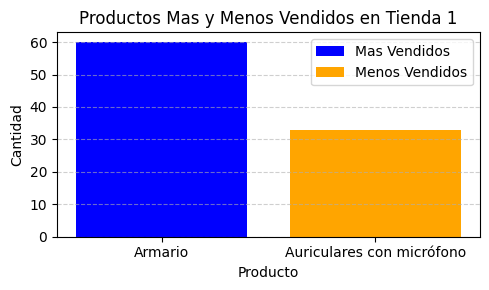

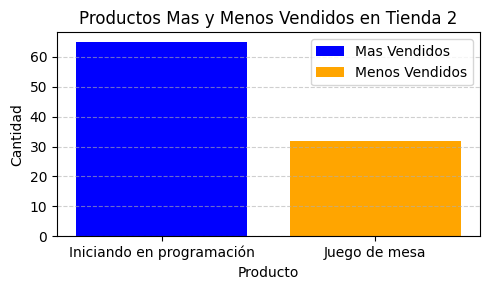

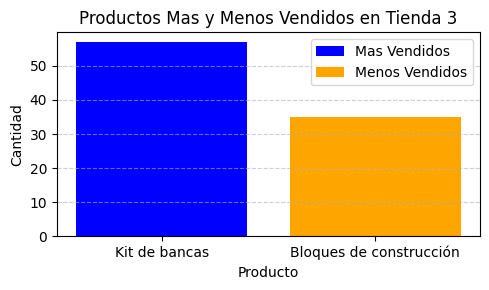

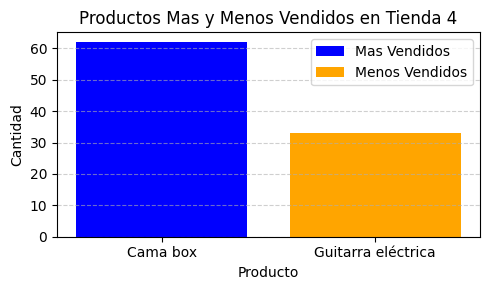

In [32]:
#Creando el grafico 2
for tienda in tiendas:
  #Filtrar datos
  tienda_mas_vendidos = productos_mas_vendidos[productos_mas_vendidos['Tienda'] == tienda]
  tienda_menos_vendidos = productos_menos_vendidos[productos_menos_vendidos['Tienda'] == tienda]
  #Grafico
  matp.figure(figsize=(5, 3))
  matp.bar(tienda_mas_vendidos['Producto'], tienda_mas_vendidos['Cantidad'], label='Mas Vendidos', color='blue')
  matp.bar(tienda_menos_vendidos['Producto'], tienda_menos_vendidos['Cantidad'], label='Menos Vendidos', color='orange')
  matp.xlabel('Producto')
  matp.ylabel('Cantidad')
  matp.title(f'Productos Mas y Menos Vendidos en {tienda}')
  matp.grid(axis='y', linestyle='--', alpha=0.6)
  matp.legend()
  matp.tight_layout()
  matp.show()


Podemos ver en los graficos y en el print, que hay diferentes productos en las diferentes tiendas que ocupan los puestos mas vendidos  y menos vendidos

# 5. Envío promedio por tienda

In [25]:
import pandas as pd
import matplotlib.pyplot as matp

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [26]:
#Creando la funcion para preparar los datos de las tiendas por envio
def prep_tienda_envio(df, nombre_tienda):
  df['Envio'] = df ['Costo de envío']
  df['Tienda'] = nombre_tienda
  return df[['Tienda', 'Envio']]

In [27]:
#Aplicamos la funcion prep_tienda_envio
t1_envio = prep_tienda_envio(tienda, 'Tienda 1')
t2_envio = prep_tienda_envio(tienda2, 'Tienda 2')
t3_envio = prep_tienda_envio(tienda3, 'Tienda 3')
t4_envio = prep_tienda_envio(tienda4, 'Tienda 4')

#Unimos los datos de las tiendas
datos_unidos_envio = pd.concat([t1_envio, t2_envio, t3_envio, t4_envio])

In [28]:
#Agrupamos por tienda y calculamos promedio de envio
envio_promedio = datos_unidos_envio.groupby(['Tienda'])['Envio'].mean().reset_index()
envio_promedio['Envio'] = envio_promedio['Envio'].round(2)

/tmp/ipython-input-1604263526.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Envio', data=envio_promedio, palette='viridis')


([0, 1, 2, 3],
 [Text(0, 0, 'Tienda 1'),
  Text(1, 0, 'Tienda 2'),
  Text(2, 0, 'Tienda 3'),
  Text(3, 0, 'Tienda 4')])

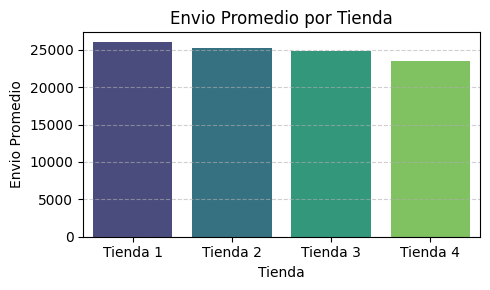

In [29]:
#Graficamos
import seaborn as sns

matp.figure(figsize=(5, 3))
sns.barplot(x='Tienda', y='Envio', data=envio_promedio, palette='viridis')
matp.xlabel('Tienda')
matp.ylabel('Envio Promedio')
matp.title('Envio Promedio por Tienda')
matp.grid(axis='y', linestyle='--', alpha=0.6)
matp.tight_layout()
matp.xticks(rotation=0)

Podemos observar en el promedio de envio, que el menor lo tiene la Tienda 4

# INFORME FINAL

## Introducción

En el siguiente informe se detallará el analisis comparativo de desempeño entre las tiendas del señor Juan, con el objhetivo de identificar cual de ellas debe ser vendida para facilitar una futura inverción en un nuevo negocio. El estudio se basa en indicadores clave como facturación anual, desempeño por categoria, calificacón del cliente y costos logisticos.

## Desarrollo

El analisis revela, segun los indicadores disponibles, que la Tienda 4 presenta el desempeño menos competitivo.


1.   Facturación anual:
      Si bien la Tienda 4 superó a la Tienda 2 en el año 2021, desde entonces no ha logrado posicionarse por encima de ninguna de las otras tres tiendas. En el año 2023, a pesar de una caída generalizada en ventas, las posiciones relativas entre tiendas se mantuvieron, evidenciando una falta de recuperación por parte de la Tienda 4.

2.   Costos de envío:
      Se deja en evidencia que la Tienda 4 tiene el promedio más bajo en gastos logísticos. Sin embargo, este aspecto positivo no compensa su bajo rendimiento en ventas ni mejora significativamente su competitividad global.

3.   Ventas por categoria:
      La Tienda 4 no destaca en ninguna categoría específica en comparación con las demás tiendas. Su participación es marginal en todos los segmentos, lo que limita su potencial de especialización o diferenciación.

4.   Calificación del cliente:
      En cuanto a satisfacción, la Tienda 4 ocupa el penúltimo lugar, lo que indica una percepción moderadamente baja por parte de los consumidores. Este indicador refuerza la idea de que su desempeño no solo es débil en ventas, sino también en experiencia de cliente.

De manera condisa, de los 5 indicadores, la Tienda 4 ha tenido observaciones 4 indicadores. La Tienda 4 no está alcanzando las metas esperadas y no presenta ventajas competitivas sostenibles frente a las demás unidades del negocio.

## Conclusión

En base a lo observado y analizado, se recomienda que el señor Juan proceda con la venta de la Tienda 4. A pesar de tener un costo logistico menor, sus resultados en ventas, posicionamiento por categoría y percepción del cliente no justifican su permanencia.